In [1]:
import pandas as pd
import os

In [2]:
events=pd.read_json("../../simulation.jsonlines", orient="records",lines=True)
planes=pd.read_json("../../plans.jsonlines", orient="records",lines=True)

In [3]:
planes

,items,simulationId,trucks
0,"[{'itemId': '0', 'locationId': '326ae8dc7810de...",a2bfd344-3b14-462a-82e7-d42aca54a650,"[{'items': ['23', '24', '4', '25', '26', '27',..."
1,"[{'itemId': '0', 'locationId': '271c4e156a04e8...",a8a11526-6b9b-4143-bfb1-ffcae600a17e,"[{'items': ['62', '63', '69', '70', '71', '21'..."
2,"[{'itemId': '0', 'locationId': '6aa95e84c67637...",2f956e3a-25df-4c5e-bb50-92d92dc9ba00,"[{'items': ['79', '20', '21', '5', '76', '59',..."
3,"[{'itemId': '0', 'locationId': '0078f3bf6db092...",45c9a42a-7cb5-4266-b0aa-a05b3f446390,"[{'items': ['3', '4', '5', '6', '72', '11', '1..."
4,"[{'itemId': '0', 'locationId': '92e059821c9ca8...",864bd9f3-074d-45e8-a032-5a01237ae290,"[{'items': ['77', '78', '79', '16', '17', '91'..."
...,...,...,...
94,"[{'itemId': '0', 'locationId': '281ec8ac82cccd...",81acb266-ab82-497b-92d9-fae490cc4823,"[{'items': ['36', '37', '49', '6', '7', '8', '..."
95,"[{'itemId': '0', 'locationId': '950001b613cb58...",f007019f-866d-48be-a0cb-bd96328ee43b,"[{'items': ['46', '47', '48', '49', '40', '24'..."
96,"[{'itemId': '0', 'locationId': 'b40599012e4fba...",f0f90050-5a0f-4965-864e-d6bc0d02b5a0,"[{'items': ['16', '17', '42', '43', '44', '45'..."
97,"[{'itemId': '0', 'locationId': '074dc13529fd8b...",e33505ca-bfdb-496f-bcfd-b8b913a42637,"[{'items': ['62', '63', '64', '86', '10', '11'..."


In [4]:
len(planes['simulationId'].unique())

99

In [5]:
events

,eventDescription,eventTime,eventType,simulationId,truckId
0,"(plaza del Dos de Mayo, 6, Madrid, [-3.7041862...",5760,Truck departed,a2bfd344-3b14-462a-82e7-d42aca54a650,1669HSZ
1,"(plaza del Dos de Mayo, 6, Madrid, [-3.7041862...",5730,Truck departed,a2bfd344-3b14-462a-82e7-d42aca54a650,8809GPH
2,"(plaza del Dos de Mayo, 6, Madrid, [-3.7041862...",5730,Truck departed,a2bfd344-3b14-462a-82e7-d42aca54a650,1161GJN
3,"(plaza del Dos de Mayo, 6, Madrid, [-3.7041862...",5430,Truck departed,a2bfd344-3b14-462a-82e7-d42aca54a650,3321FBL
4,"(plaza del Dos de Mayo, 6, Madrid, [-3.7041862...",5310,Truck departed,a2bfd344-3b14-462a-82e7-d42aca54a650,2423VRT
...,...,...,...,...,...
26577,"(calle de Juan de Austria, 1, Madrid, [-3.6991...",11562780,Truck arrived,f0f90050-5a0f-4965-864e-d6bc0d02b5a0,8386WZB
26578,"Packet 83 to (calle de Juan de Austria, 1, Mad...",11623380,Truck ended delivering,f0f90050-5a0f-4965-864e-d6bc0d02b5a0,8386WZB
26579,"(plaza del Dos de Mayo, 6, Madrid, [-3.7041862...",11623470,Truck departed to depot,f0f90050-5a0f-4965-864e-d6bc0d02b5a0,8386WZB
26580,,11813550,Truck ended route,f0f90050-5a0f-4965-864e-d6bc0d02b5a0,8386WZB


In [6]:
len(events['simulationId'].unique())

99

In [7]:
len(events['eventType'].unique())

8

## Tiempos de entrega

In [8]:
entregas = events[events.eventType.isin(["Truck ended delivering", "Truck started delivering"])]
entregas = entregas.sort_values("eventType",ascending=True)
entregas = entregas.sort_values(by=["simulationId", "truckId", "eventTime"])

In [9]:
entregas["deliverTime"] = entregas["eventTime"].diff()
entregas = entregas[entregas.eventType == "Truck ended delivering"]
entregas

,eventDescription,eventTime,eventType,simulationId,truckId,deliverTime
13021,"Packet 78 to (calle del Poeta Blas de Otero, 2...",872250,Truck ended delivering,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,120630.0
13112,"Packet 79 to (calle del Poeta Blas de Otero, 2...",992820,Truck ended delivering,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,120570.0
13566,"Packet 50 to (calle de Valdecanillas, 59, Madr...",1536120,Truck ended delivering,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,60600.0
13614,"Packet 51 to (calle de Valdecanillas, 59, Madr...",1596720,Truck ended delivering,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,60600.0
13666,"Packet 52 to (calle de Valdecanillas, 59, Madr...",1657320,Truck ended delivering,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,60600.0
...,...,...,...,...,...,...
11113,"Packet 42 to (calle de la Comunidad de Madrid,...",7565580,Truck ended delivering,fea13535-ade6-4215-96ca-dab5b4ef309b,6965XLY,60600.0
11176,"Packet 43 to (calle de la Comunidad de Madrid,...",7626180,Truck ended delivering,fea13535-ade6-4215-96ca-dab5b4ef309b,6965XLY,60570.0
11655,"Packet 79 to (calle San Andrés, 21, Majadahond...",8243580,Truck ended delivering,fea13535-ade6-4215-96ca-dab5b4ef309b,6965XLY,60600.0
11729,"Packet 80 to (calle San Andrés, 21, Majadahond...",8304180,Truck ended delivering,fea13535-ade6-4215-96ca-dab5b4ef309b,6965XLY,60600.0


In [10]:
events["eventType"].value_counts()

Truck started delivering    8567
Truck ended delivering      8567
Truck departed              3444
Truck arrived               3444
Truck initialized            640
Truck received packets       640
Truck departed to depot      640
Truck ended route            640
Name: eventType, dtype: int64

In [11]:
entregas = events[events.eventType.isin(['Truck ended delivering', 'Truck started delivering'])]

entregas = entregas.sort_values(by=['simulationId', 'truckId', 'eventTime', 'eventType'])[:10]

entregas['delta'] = entregas.eventTime.diff(1) #a cada fila le resta lo q hubiese en la fila 

entregas = entregas[entregas.eventType == 'Truck ended delivering'] #solo me intersa ver las filas de acabar la entrega

entregas

,eventDescription,eventTime,eventType,simulationId,truckId,delta
13021,"Packet 78 to (calle del Poeta Blas de Otero, 2...",872250,Truck ended delivering,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,120630.0
13112,"Packet 79 to (calle del Poeta Blas de Otero, 2...",992820,Truck ended delivering,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,120570.0
13566,"Packet 50 to (calle de Valdecanillas, 59, Madr...",1536120,Truck ended delivering,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,60600.0
13614,"Packet 51 to (calle de Valdecanillas, 59, Madr...",1596720,Truck ended delivering,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,60600.0
13666,"Packet 52 to (calle de Valdecanillas, 59, Madr...",1657320,Truck ended delivering,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,60600.0


In [12]:
entregas.delta.describe()

count         5.000000
mean      84600.000000
std       32863.360297
min       60600.000000
25%       60600.000000
50%       60600.000000
75%      120570.000000
max      120630.000000
Name: delta, dtype: float64

In [13]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:xlabel='delta', ylabel='Count'>

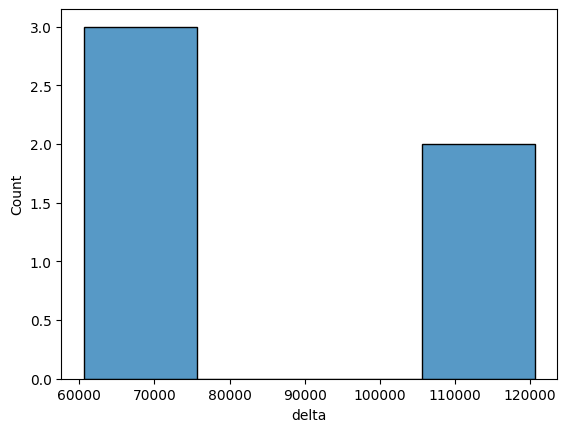

In [14]:
import seaborn as sns

sns.histplot(entregas.delta)

## Desanidar los planes

In [15]:
planes

,items,simulationId,trucks
0,"[{'itemId': '0', 'locationId': '326ae8dc7810de...",a2bfd344-3b14-462a-82e7-d42aca54a650,"[{'items': ['23', '24', '4', '25', '26', '27',..."
1,"[{'itemId': '0', 'locationId': '271c4e156a04e8...",a8a11526-6b9b-4143-bfb1-ffcae600a17e,"[{'items': ['62', '63', '69', '70', '71', '21'..."
2,"[{'itemId': '0', 'locationId': '6aa95e84c67637...",2f956e3a-25df-4c5e-bb50-92d92dc9ba00,"[{'items': ['79', '20', '21', '5', '76', '59',..."
3,"[{'itemId': '0', 'locationId': '0078f3bf6db092...",45c9a42a-7cb5-4266-b0aa-a05b3f446390,"[{'items': ['3', '4', '5', '6', '72', '11', '1..."
4,"[{'itemId': '0', 'locationId': '92e059821c9ca8...",864bd9f3-074d-45e8-a032-5a01237ae290,"[{'items': ['77', '78', '79', '16', '17', '91'..."
...,...,...,...
94,"[{'itemId': '0', 'locationId': '281ec8ac82cccd...",81acb266-ab82-497b-92d9-fae490cc4823,"[{'items': ['36', '37', '49', '6', '7', '8', '..."
95,"[{'itemId': '0', 'locationId': '950001b613cb58...",f007019f-866d-48be-a0cb-bd96328ee43b,"[{'items': ['46', '47', '48', '49', '40', '24'..."
96,"[{'itemId': '0', 'locationId': 'b40599012e4fba...",f0f90050-5a0f-4965-864e-d6bc0d02b5a0,"[{'items': ['16', '17', '42', '43', '44', '45'..."
97,"[{'itemId': '0', 'locationId': '074dc13529fd8b...",e33505ca-bfdb-496f-bcfd-b8b913a42637,"[{'items': ['62', '63', '64', '86', '10', '11'..."


In [16]:
pd.DataFrame(planes.trucks[0])

,items,route,truck_id
0,"[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH
1,"[74, 75, 76, 67, 68, 69, 70, 92, 93, 94, 55, 5...","[{'destination': 'faf06210580833f8c7963506', '...",2423VRT
2,"[18, 19, 57, 58, 88, 89, 90, 91, 54, 20, 21, 2...","[{'destination': 'bef2df0471ee1c26b4ab6ba9', '...",0265TYL
3,"[87, 0, 1, 2, 3, 33, 95, 96, 97]","[{'destination': '7a249403ad22a72495769f75', '...",8809GPH
4,"[31, 32, 37, 38, 39, 66]","[{'destination': '1e38734ff239ccf75bf04b95', '...",1161GJN
5,[86],"[{'destination': '7d1544d169eeeb1d917e9f02', '...",1669HSZ
6,"[77, 78, 79, 52, 53, 29, 30, 80, 81, 82, 34, 3...","[{'destination': '166c008321c564cf6c885cb2', '...",3321FBL


In [17]:
pd.DataFrame(pd.DataFrame(planes.trucks[0]).route[0])

,destination,duration,origin
0,af3ea5c0e98151a51bd39c64,197,ce6feed06bc1a9e5aff95f04
1,c0430d1e19c34a06e343a270,733,af3ea5c0e98151a51bd39c64
2,b31f6bb5c55435cb5495a62b,380,c0430d1e19c34a06e343a270
3,58a50ddf91095c052e330fd6,612,b31f6bb5c55435cb5495a62b
4,910cd4ad38bc68ff7abdd941,850,58a50ddf91095c052e330fd6
5,49a09d201cc830dc1c4e87fc,241,910cd4ad38bc68ff7abdd941
6,324beca4107779629830c6d3,689,49a09d201cc830dc1c4e87fc
7,123039c250dd5a3e7c3e4fc8,187,324beca4107779629830c6d3
8,5a13a4517d5fc3018de2dbea,1203,123039c250dd5a3e7c3e4fc8
9,ce6feed06bc1a9e5aff95f04,99,5a13a4517d5fc3018de2dbea


In [18]:
planes_desanidado = planes.join(planes.trucks.explode().apply(pd.Series), lsuffix='_planes').reset_index(drop=True)
planes_desanidado

,items_planes,simulationId,trucks,items,route,truck_id
0,"[{'itemId': '0', 'locationId': '326ae8dc7810de...",a2bfd344-3b14-462a-82e7-d42aca54a650,"[{'items': ['23', '24', '4', '25', '26', '27',...","[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH
1,"[{'itemId': '0', 'locationId': '326ae8dc7810de...",a2bfd344-3b14-462a-82e7-d42aca54a650,"[{'items': ['23', '24', '4', '25', '26', '27',...","[74, 75, 76, 67, 68, 69, 70, 92, 93, 94, 55, 5...","[{'destination': 'faf06210580833f8c7963506', '...",2423VRT
2,"[{'itemId': '0', 'locationId': '326ae8dc7810de...",a2bfd344-3b14-462a-82e7-d42aca54a650,"[{'items': ['23', '24', '4', '25', '26', '27',...","[18, 19, 57, 58, 88, 89, 90, 91, 54, 20, 21, 2...","[{'destination': 'bef2df0471ee1c26b4ab6ba9', '...",0265TYL
3,"[{'itemId': '0', 'locationId': '326ae8dc7810de...",a2bfd344-3b14-462a-82e7-d42aca54a650,"[{'items': ['23', '24', '4', '25', '26', '27',...","[87, 0, 1, 2, 3, 33, 95, 96, 97]","[{'destination': '7a249403ad22a72495769f75', '...",8809GPH
4,"[{'itemId': '0', 'locationId': '326ae8dc7810de...",a2bfd344-3b14-462a-82e7-d42aca54a650,"[{'items': ['23', '24', '4', '25', '26', '27',...","[31, 32, 37, 38, 39, 66]","[{'destination': '1e38734ff239ccf75bf04b95', '...",1161GJN
...,...,...,...,...,...,...
635,"[{'itemId': '0', 'locationId': 'd1214b27823e6d...",6deec7b7-6c11-418c-a1bd-f99a9e3261b6,"[{'items': ['53', '54', '55', '83', '84', '85'...","[53, 54, 55, 83, 84, 85, 86, 26, 27, 29, 30, 3...","[{'destination': '225cd814768e8ca390983313', '...",5534TPH
636,"[{'itemId': '0', 'locationId': 'd1214b27823e6d...",6deec7b7-6c11-418c-a1bd-f99a9e3261b6,"[{'items': ['53', '54', '55', '83', '84', '85'...","[72, 73, 74, 88, 89, 90, 91, 43, 62, 63, 64, 3...","[{'destination': '417bf3aae83127cd905f3bc9', '...",3953RLD
637,"[{'itemId': '0', 'locationId': 'd1214b27823e6d...",6deec7b7-6c11-418c-a1bd-f99a9e3261b6,"[{'items': ['53', '54', '55', '83', '84', '85'...","[6, 7, 8, 9]","[{'destination': '1e1251e186dd507f63e4d1e6', '...",5030LXK
638,"[{'itemId': '0', 'locationId': 'd1214b27823e6d...",6deec7b7-6c11-418c-a1bd-f99a9e3261b6,"[{'items': ['53', '54', '55', '83', '84', '85'...","[44, 45, 46, 47, 94, 20, 21, 22, 95, 96, 97, 6...","[{'destination': '6a33d0bcd3624ccb86febf09', '...",3321FBL


In [19]:
planes_desanidado_x2 = planes_desanidado.join(planes_desanidado.route.explode().apply(pd.Series)).reset_index(drop=True)
planes_desanidado_x2[['simulationId', 'truck_id', 'origin', 'destination', 'duration']]

,simulationId,truck_id,origin,destination,duration
0,a2bfd344-3b14-462a-82e7-d42aca54a650,5534TPH,ce6feed06bc1a9e5aff95f04,af3ea5c0e98151a51bd39c64,197
1,a2bfd344-3b14-462a-82e7-d42aca54a650,5534TPH,af3ea5c0e98151a51bd39c64,c0430d1e19c34a06e343a270,733
2,a2bfd344-3b14-462a-82e7-d42aca54a650,5534TPH,c0430d1e19c34a06e343a270,b31f6bb5c55435cb5495a62b,380
3,a2bfd344-3b14-462a-82e7-d42aca54a650,5534TPH,b31f6bb5c55435cb5495a62b,58a50ddf91095c052e330fd6,612
4,a2bfd344-3b14-462a-82e7-d42aca54a650,5534TPH,58a50ddf91095c052e330fd6,910cd4ad38bc68ff7abdd941,850
...,...,...,...,...,...
4079,6deec7b7-6c11-418c-a1bd-f99a9e3261b6,6270NFM,20ee036e147b4a1bd5af0e1c,5bec37aee4796cc965e71c88,1173
4080,6deec7b7-6c11-418c-a1bd-f99a9e3261b6,6270NFM,5bec37aee4796cc965e71c88,1f183bd64aa5bfae47843de5,1198
4081,6deec7b7-6c11-418c-a1bd-f99a9e3261b6,6270NFM,1f183bd64aa5bfae47843de5,4551fdc303a5ddafa1dcf28c,1133
4082,6deec7b7-6c11-418c-a1bd-f99a9e3261b6,6270NFM,4551fdc303a5ddafa1dcf28c,2884f6b369dc20f3051a216d,804


In [20]:
planes_desanidado_x2.sort_values(by=["simulationId", "truck_id"], inplace=True)

PARTE 2


In [21]:
primer_nivel = planes[['simulationId']].join(planes.trucks.explode().apply(pd.Series)).reset_index(drop=True)

segundo_nivel = primer_nivel.join(primer_nivel.route.explode().apply(pd.Series)).reset_index(drop=True)
segundo_nivel


,simulationId,items,route,truck_id,destination,duration,origin
0,a2bfd344-3b14-462a-82e7-d42aca54a650,"[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,af3ea5c0e98151a51bd39c64,197,ce6feed06bc1a9e5aff95f04
1,a2bfd344-3b14-462a-82e7-d42aca54a650,"[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,c0430d1e19c34a06e343a270,733,af3ea5c0e98151a51bd39c64
2,a2bfd344-3b14-462a-82e7-d42aca54a650,"[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,b31f6bb5c55435cb5495a62b,380,c0430d1e19c34a06e343a270
3,a2bfd344-3b14-462a-82e7-d42aca54a650,"[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,58a50ddf91095c052e330fd6,612,b31f6bb5c55435cb5495a62b
4,a2bfd344-3b14-462a-82e7-d42aca54a650,"[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,910cd4ad38bc68ff7abdd941,850,58a50ddf91095c052e330fd6
...,...,...,...,...,...,...,...
4079,6deec7b7-6c11-418c-a1bd-f99a9e3261b6,"[79, 80, 81, 82, 24, 25, 40, 41, 42, 12, 23, 9...","[{'destination': '17c23e21622baec6f08861dd', '...",6270NFM,5bec37aee4796cc965e71c88,1173,20ee036e147b4a1bd5af0e1c
4080,6deec7b7-6c11-418c-a1bd-f99a9e3261b6,"[79, 80, 81, 82, 24, 25, 40, 41, 42, 12, 23, 9...","[{'destination': '17c23e21622baec6f08861dd', '...",6270NFM,1f183bd64aa5bfae47843de5,1198,5bec37aee4796cc965e71c88
4081,6deec7b7-6c11-418c-a1bd-f99a9e3261b6,"[79, 80, 81, 82, 24, 25, 40, 41, 42, 12, 23, 9...","[{'destination': '17c23e21622baec6f08861dd', '...",6270NFM,4551fdc303a5ddafa1dcf28c,1133,1f183bd64aa5bfae47843de5
4082,6deec7b7-6c11-418c-a1bd-f99a9e3261b6,"[79, 80, 81, 82, 24, 25, 40, 41, 42, 12, 23, 9...","[{'destination': '17c23e21622baec6f08861dd', '...",6270NFM,2884f6b369dc20f3051a216d,804,4551fdc303a5ddafa1dcf28c


In [22]:
events.eventType.unique()

array(['Truck departed', 'Truck initialized', 'Truck received packets',
       'Truck arrived', 'Truck started delivering',
       'Truck ended delivering', 'Truck departed to depot',
       'Truck ended route'], dtype=object)

In [23]:
viajes = events[events.eventType.isin(['Truck departed', 'Truck arrived', 'Truck departed to depot','Truck ended route'])]
viajes = viajes.sort_values(by=['simulationId', 'truckId', 'eventTime'])

viajes['delta'] = viajes.eventTime.diff(1) #a cada fila le resta lo q hubiese en la fila 

viajes = viajes[viajes.eventType.isin(['Truck ended route', 'Truck arrived'])].reset_index(drop=True) #solo me intersa ver las filas de acabar la entrega

viajes

,eventDescription,eventTime,eventType,simulationId,truckId,delta
0,"(calle del Poeta Blas de Otero, 22, Madrid, [-...",751620,Truck arrived,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,750960.0
1,"(calle de Valdecanillas, 59, Madrid, [-3.62356...",1475520,Truck arrived,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,482520.0
2,"(avda de la Institución Libre de Enseñanza, 19...",1969320,Truck arrived,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,311850.0
3,"(bulev de José Prat, 5, Madrid, [-3.6233859044...",2508720,Truck arrived,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,418680.0
4,"(avda de la Albufera, 432, Madrid, [-3.6302862...",3088320,Truck arrived,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,458820.0
...,...,...,...,...,...,...
4079,"(calle Marqués de Alonso Martínez, 9, Alcalá d...",3259080,Truck arrived,fea13535-ade6-4215-96ca-dab5b4ef309b,6965XLY,198720.0
4080,"(calle San Vidal, 24, Alcalá de Henares, [-3.3...",3933480,Truck arrived,fea13535-ade6-4215-96ca-dab5b4ef309b,6965XLY,372420.0
4081,"(calle de la Comunidad de Madrid, 37, Rozas de...",7323780,Truck arrived,fea13535-ade6-4215-96ca-dab5b4ef309b,6965XLY,3208830.0
4082,"(calle San Andrés, 21, Majadahonda, [-3.871769...",8182980,Truck arrived,fea13535-ade6-4215-96ca-dab5b4ef309b,6965XLY,556620.0


In [24]:
segundo_nivel = segundo_nivel.sort_values(by=['simulationId', 'truck_id']).reset_index(drop=True)
segundo_nivel

,simulationId,items,route,truck_id,destination,duration,origin
0,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,"[78, 79, 50, 51, 52, 23, 21, 58, 59, 60, 61, 4...","[{'destination': '2e8d1b7b9fad4f083892d83c', '...",3321FBL,2e8d1b7b9fad4f083892d83c,614,ce6feed06bc1a9e5aff95f04
1,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,"[78, 79, 50, 51, 52, 23, 21, 58, 59, 60, 61, 4...","[{'destination': '2e8d1b7b9fad4f083892d83c', '...",3321FBL,f5a3aab0c10fb7c5c60f2b01,397,2e8d1b7b9fad4f083892d83c
2,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,"[78, 79, 50, 51, 52, 23, 21, 58, 59, 60, 61, 4...","[{'destination': '2e8d1b7b9fad4f083892d83c', '...",3321FBL,4b5f692a806a39d1317d15d4,259,f5a3aab0c10fb7c5c60f2b01
3,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,"[78, 79, 50, 51, 52, 23, 21, 58, 59, 60, 61, 4...","[{'destination': '2e8d1b7b9fad4f083892d83c', '...",3321FBL,64bba266de127a5949f52d9a,349,4b5f692a806a39d1317d15d4
4,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,"[78, 79, 50, 51, 52, 23, 21, 58, 59, 60, 61, 4...","[{'destination': '2e8d1b7b9fad4f083892d83c', '...",3321FBL,6942f2624e971761b7dd9208,384,64bba266de127a5949f52d9a
...,...,...,...,...,...,...,...
4079,fea13535-ade6-4215-96ca-dab5b4ef309b,"[15, 44, 45, 46, 47, 22, 23, 24, 2, 3, 40, 41,...","[{'destination': '58bb022022a0e97ef0efcf46', '...",6965XLY,92e059821c9ca8b3967bece4,157,fb28b93228a49e10f73abd62
4080,fea13535-ade6-4215-96ca-dab5b4ef309b,"[15, 44, 45, 46, 47, 22, 23, 24, 2, 3, 40, 41,...","[{'destination': '58bb022022a0e97ef0efcf46', '...",6965XLY,1f9012c136c055e10f9ef9cb,300,92e059821c9ca8b3967bece4
4081,fea13535-ade6-4215-96ca-dab5b4ef309b,"[15, 44, 45, 46, 47, 22, 23, 24, 2, 3, 40, 41,...","[{'destination': '58bb022022a0e97ef0efcf46', '...",6965XLY,0efbacc39472a86ca3de1b21,2620,1f9012c136c055e10f9ef9cb
4082,fea13535-ade6-4215-96ca-dab5b4ef309b,"[15, 44, 45, 46, 47, 22, 23, 24, 2, 3, 40, 41,...","[{'destination': '58bb022022a0e97ef0efcf46', '...",6965XLY,7658997164924eab18ea6e08,472,0efbacc39472a86ca3de1b21


In [25]:
df = segundo_nivel.join(viajes[['eventTime', 'delta']])
df

,simulationId,items,route,truck_id,destination,duration,origin,eventTime,delta
0,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,"[78, 79, 50, 51, 52, 23, 21, 58, 59, 60, 61, 4...","[{'destination': '2e8d1b7b9fad4f083892d83c', '...",3321FBL,2e8d1b7b9fad4f083892d83c,614,ce6feed06bc1a9e5aff95f04,751620,750960.0
1,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,"[78, 79, 50, 51, 52, 23, 21, 58, 59, 60, 61, 4...","[{'destination': '2e8d1b7b9fad4f083892d83c', '...",3321FBL,f5a3aab0c10fb7c5c60f2b01,397,2e8d1b7b9fad4f083892d83c,1475520,482520.0
2,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,"[78, 79, 50, 51, 52, 23, 21, 58, 59, 60, 61, 4...","[{'destination': '2e8d1b7b9fad4f083892d83c', '...",3321FBL,4b5f692a806a39d1317d15d4,259,f5a3aab0c10fb7c5c60f2b01,1969320,311850.0
3,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,"[78, 79, 50, 51, 52, 23, 21, 58, 59, 60, 61, 4...","[{'destination': '2e8d1b7b9fad4f083892d83c', '...",3321FBL,64bba266de127a5949f52d9a,349,4b5f692a806a39d1317d15d4,2508720,418680.0
4,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,"[78, 79, 50, 51, 52, 23, 21, 58, 59, 60, 61, 4...","[{'destination': '2e8d1b7b9fad4f083892d83c', '...",3321FBL,6942f2624e971761b7dd9208,384,64bba266de127a5949f52d9a,3088320,458820.0
...,...,...,...,...,...,...,...,...,...
4079,fea13535-ade6-4215-96ca-dab5b4ef309b,"[15, 44, 45, 46, 47, 22, 23, 24, 2, 3, 40, 41,...","[{'destination': '58bb022022a0e97ef0efcf46', '...",6965XLY,92e059821c9ca8b3967bece4,157,fb28b93228a49e10f73abd62,3259080,198720.0
4080,fea13535-ade6-4215-96ca-dab5b4ef309b,"[15, 44, 45, 46, 47, 22, 23, 24, 2, 3, 40, 41,...","[{'destination': '58bb022022a0e97ef0efcf46', '...",6965XLY,1f9012c136c055e10f9ef9cb,300,92e059821c9ca8b3967bece4,3933480,372420.0
4081,fea13535-ade6-4215-96ca-dab5b4ef309b,"[15, 44, 45, 46, 47, 22, 23, 24, 2, 3, 40, 41,...","[{'destination': '58bb022022a0e97ef0efcf46', '...",6965XLY,0efbacc39472a86ca3de1b21,2620,1f9012c136c055e10f9ef9cb,7323780,3208830.0
4082,fea13535-ade6-4215-96ca-dab5b4ef309b,"[15, 44, 45, 46, 47, 22, 23, 24, 2, 3, 40, 41,...","[{'destination': '58bb022022a0e97ef0efcf46', '...",6965XLY,7658997164924eab18ea6e08,472,0efbacc39472a86ca3de1b21,8182980,556620.0


PARTE 3


Travel Model Metrics:
Mean Absolute Error (MAE): 234.34842736267365
Mean Squared Error (MSE): 315878.51970905275
R-squared (R²): 0.6984509369553433


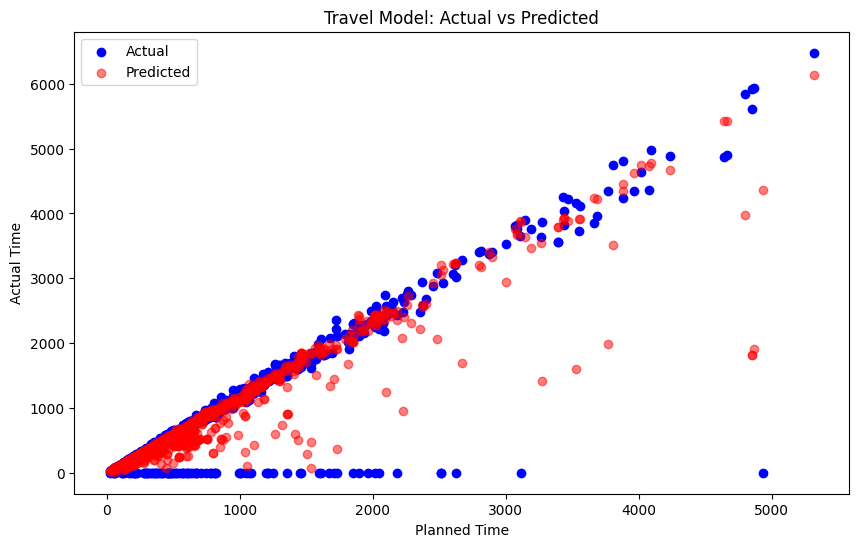


Delivery Model Metrics:
Mean Absolute Error (MAE): 33956.27897300983
Mean Squared Error (MSE): 1378860707.9740613
R-squared (R²): -0.004639447525433438


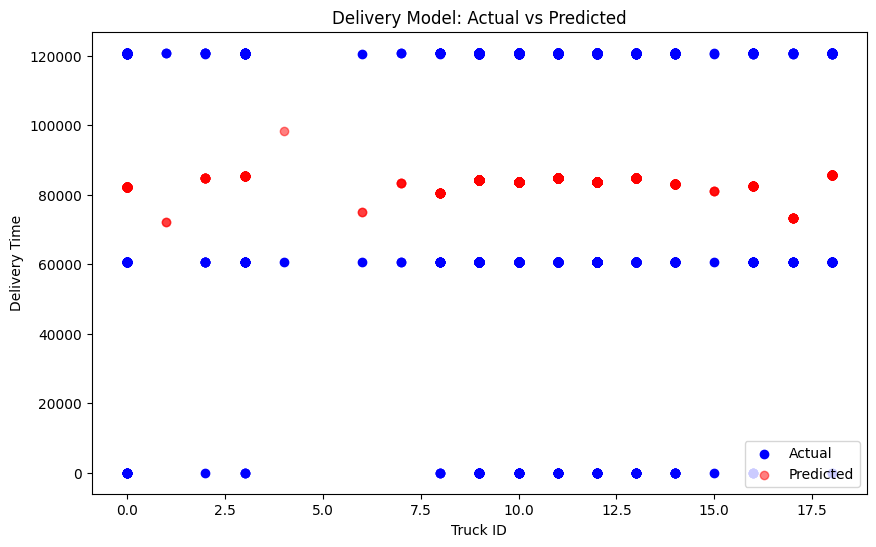

: 

In [48]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load data from the JSON lines files
eventos = pd.read_json("../../simulation.jsonlines", lines=True)
planes = pd.read_json("../../plans.jsonlines", lines=True)

# Process truck routes from plans
camiones = []
for simId in planes.simulationId.unique():
    for truck in planes[planes.simulationId == simId].trucks.values[0]:
        camiones.append(pd.DataFrame(truck["route"]).assign(simulationId=simId, truckId=truck["truck_id"]))
camiones = pd.concat(camiones)

# Calculate planned durations
tiempos_plan = camiones.sort_values(["simulationId", "truckId"]).assign(duration=lambda x: x["duration"] * 1000).groupby(["simulationId", "truckId"]).duration.agg(list).reset_index()
tiempos_plan.rename(columns={"duration": "tiempo_plan"}, inplace=True)

# Process event data
eventos = eventos.sort_values(["simulationId", "truckId", "eventTime"])
eventos["prev_event"] = eventos.groupby(["truckId", "simulationId"])["eventType"].shift(1)
eventos["prev_time"] = eventos.groupby(["truckId", "simulationId"])["eventTime"].shift(1)
eventos["delta"] = eventos.eventTime - eventos.prev_time
tiempos_sim = eventos[eventos.eventType.isin(["Truck arrived", "Truck ended route"])].sort_values(["simulationId", "truckId", "eventTime"]).groupby(["simulationId", "truckId"]).delta.agg(list).reset_index()
tiempos_sim.rename(columns={"delta": "tiempo_sim"}, inplace=True)
retrasos = tiempos_sim.merge(tiempos_plan, on=["simulationId", "truckId"]).dropna().reset_index(drop=True)

# Prepare data for model training
arr = np.array(retrasos.apply(lambda x: list(zip(x.tiempo_plan, x.tiempo_sim)), axis=1).explode())
arr = np.array(arr.tolist())
x = arr[:, 0].reshape(-1, 1) / 1000  # Planned time
y = arr[:, 1].reshape(-1, 1) / 1000  # Actual time

# Split data for travel model
x_train, x_test, y_train, y_test = train_test_split(x, y.ravel(), test_size=0.2, random_state=42)

# Train the travel model with RandomForestRegressor
travel_model = RandomForestRegressor(n_estimators=100, random_state=42)
travel_model.fit(x_train, y_train)

# Make predictions with the travel model
y_pred_travel = travel_model.predict(x_test)

# Calculate and print metrics for the travel model
print("Travel Model Metrics:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_travel)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_travel)}")
print(f"R-squared (R²): {r2_score(y_test, y_pred_travel)}")

# Plot actual vs predicted values for the travel model
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test, y_pred_travel, color='red', alpha=0.5, label='Predicted')
plt.title('Travel Model: Actual vs Predicted')
plt.xlabel('Planned Time')
plt.ylabel('Actual Time')
plt.legend()
plt.show()

# Prepare data for the delivery model
tiemposEntrega = eventos[eventos.eventType == "Truck ended delivering"][["truckId", "delta"]]

# Label encoding for truckId
le = LabelEncoder()
tiemposEntrega["truckId"] = le.fit_transform(tiemposEntrega["truckId"])

# Prepare data for delivery model
X_deliv = tiemposEntrega["truckId"].values.reshape(-1, 1)
y_deliv = tiemposEntrega["delta"].values.ravel()
X_train_deliv, X_test_deliv, y_train_deliv, y_test_deliv = train_test_split(X_deliv, y_deliv, test_size=0.2, random_state=42)

# Train the delivery model with RandomForestRegressor
delivery_model = RandomForestRegressor(n_estimators=100, random_state=42)
delivery_model.fit(X_train_deliv, y_train_deliv)

# Make predictions with the delivery model
y_pred_delivery = delivery_model.predict(X_test_deliv)

# Calculate and print metrics for the delivery model
print("\nDelivery Model Metrics:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test_deliv, y_pred_delivery)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test_deliv, y_pred_delivery)}")
print(f"R-squared (R²): {r2_score(y_test_deliv, y_pred_delivery)}")

# Plot actual vs predicted values for the delivery model
plt.figure(figsize=(10, 6))
plt.scatter(X_test_deliv, y_test_deliv, color='blue', label='Actual')
plt.scatter(X_test_deliv, y_pred_delivery, color='red', alpha=0.5, label='Predicted')
plt.title('Delivery Model: Actual vs Predicted')
plt.xlabel('Truck ID')
plt.ylabel('Delivery Time')
plt.legend()
plt.show()

# Optionally, save your models and the label encoder to disk
with open('travelModel.pkl', 'wb') as f:
    pickle.dump(travel_model, f)
with open('deliveryModel.pkl', 'wb') as f:
    pickle.dump(delivery_model, f)
with open('le.pkl', 'wb') as f:
    pickle.dump(le, f)
